In [0]:
import numpy as np

In [0]:
from scipy import stats

In [0]:
import random

In [0]:
import matplotlib.pyplot as plt

In [0]:
class k_means(object):

  #function to predict the classes based on input value of k
  def fit(self,x_train,k,iter_count=1000):
    x=np.array(x_train)
    self.k=k
    m=x.shape[0]
    n=x.shape[1]
    X = np.zeros((m,n))
  #normalisation
    for a in range(n):
      X[:,a]=(x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
  #randomly initialising k centroids
    idx = random.sample(range(m),self.k)
    mean = np.zeros((self.k,n))
    for a in range(self.k):
      mean[a:a+1,:] = X[idx[a]:idx[a]+1,:] 
    for i in range(iter_count):     
      cost_func = 0   
  #counting the no. of points in each cluster
      count = np.zeros((self.k,1))
      c = np.zeros((m,1))
  #finding distances and assigning each point to a cluster
      for a in range(m):     
        dist = np.sum((X[a:a+1,:]-mean)**2,axis=1)
        c[a] = np.argmin(dist)
      mean = np.zeros((self.k,n))
  #updating the centroid of each cluster
      for a in range(m):
        mean[int(c[a]):int(c[a])+1,:] += X[a:a+1,:]
        count[int(c[a])]+=1
      for a in range(self.k):
        mean[a:a+1,:]/=count[a]
  #finding the cost function
      for a in range(m):
        cost_func +=np.sum((X[a:a+1,:] - mean[int(c[a]):int(c[a])+1,:])**2)
      cost_func /= m
    return c

  def accuracy(self,y_true,y_pred):
    m=len(y_pred)
    acc=0
    for a in range(m):
      if y_true[a] == y_pred[a]:
        acc+=1
    return (acc*100)/m

In [0]:
import pandas as pd

In [0]:
df1 = pd.read_csv("sample_data/mnist_train_small.csv",header = None)

In [0]:
y_train = df1[0]

In [0]:
x_train = df1.drop(0,axis = 1,inplace = False)

In [0]:
model = k_means()

In [0]:
y_pred = model.fit(x_train,10)

In [0]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010800,0.010800,0.00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012400,0.028450,0.058300,0.065500,0.127550,...,3.713850,2.627100,1.718400,1.020050,0.553200,0.247400,0.097750,0.020750,0.00140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010650,0.036050,0.088300,0.112300,0.158500,0.276900,0.406050,0.546800,0.572050,0.696200,0.671650,0.54590,0.36630,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070711,1.527351,1.527351,0.06364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233338,1.986539,3.473241,3.100708,5.002952,...,26.814446,22.334028,18.262349,14.000437,10.463161,6.750598,4.079011,1.322084,0.19799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049497,1.095078,2.220765,3.900047,4.749833,5.406638,7.005125,8.718932,10.378882,10.254588,11.457106,11.296983,10.05708,8.25534,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

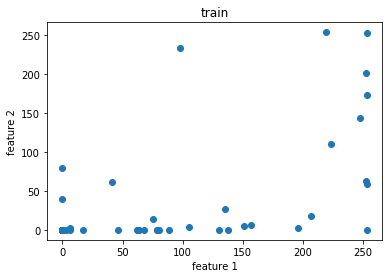

In [0]:
X = np.array(x_train)
plt.scatter(X[:,774],X[:,775])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("train")
plt.show()

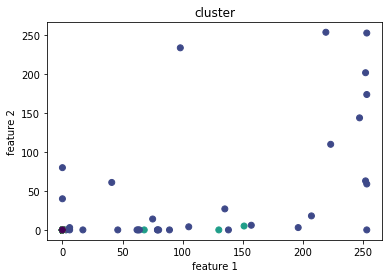

In [0]:
X = np.array(x_train)
plt.scatter(X[:,774],X[:,775],c=list(y_pred.T)[0])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("cluster")
plt.show()

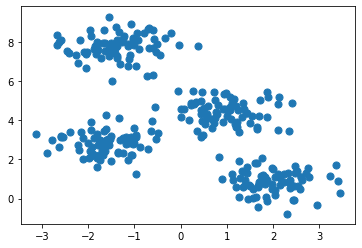

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
model = k_means()

In [0]:
y = model.fit(X,4)

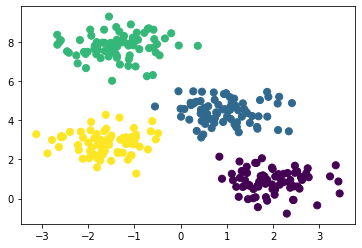

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=list(y.T)[0], s=50, cmap='viridis')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving DoubleMoon2.txt to DoubleMoon2.txt


In [0]:
df1 = pd.read_csv("DoubleMoon2.txt",sep = ",",header = None)

In [0]:
x = df1.drop(2,axis = 1,inplace = False)

In [0]:
y = df1[2]

In [0]:
model=k_means()

In [0]:
y_pred = model.fit(x,2)

In [0]:
model.accuracy(y,y_pred)

95.43

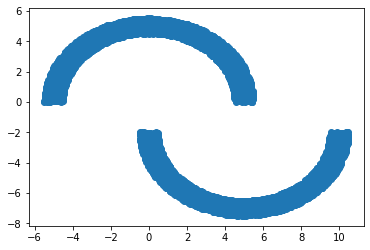

In [0]:
X = np.array(x)
plt.scatter(X[:, 0], X[:, 1])

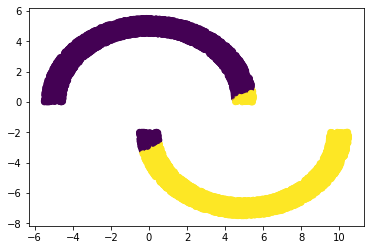

In [0]:
plt.scatter(X[:, 0], X[:, 1],c=list(y_pred.T)[0]);